# Re-doing the Iris analysis - Using a Naive Bayes Classifier

## Introduction

In this notebook I will re-do the Iris data analysis using a naive Bayes classifier. I will collect pieces and snippets from our [textbook](http://bit.ly/2xoFamE) and combine them in my own classification of the Iris data set using a naive Bayes classifier.

I will setup the analysis using the generic Scikit-Learn steps as explained in the book. I will explain each step in a markdown cell, using my own words.

## Research question
[_Phrase your research question here. (Remember: you want to classify.) You can reuse the question from your SVM classifier.)_]

## Analysis
[_write a brief introduction to your analysis below. Briefly describe your classifier_]

http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

the iris multidimensional dataset was introduced by Roland Fisher in 1936

http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

### 1. load the iris data set (see Introducing Scikit-Learn)
[_describe briefly what your data set is about and where you get the data from_]

In [44]:
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

#load the iris data
iris = datasets.load_iris()
print(iris)

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

C:\Users\KLaus\Miniconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### 2. create a feature matrix X and a target array y from the data set
[_describe how you are going to prepare the data set and for what reason_]

In [45]:
matrixX = np.array([i[:2] for i in iris['data']])
print('matrix X')
print(matrixX)

print('taget')
target = np.array(iris['target'])
print(target)

matrix X
[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 

### 3. split the data in a test and train set
[_describe how you are going to split the data set and for what reason_]

In [91]:
x, x1, y, yHat = \
train_test_split(matrixX, target, random_state = 0, train_size = 0.5)

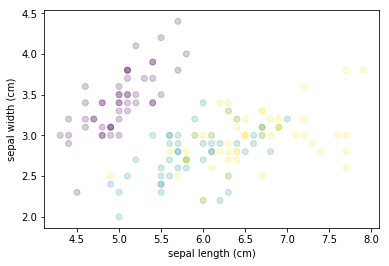

In [87]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

#select the first two features
plt.scatter(features[0], features[1], alpha=0.2, c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);
plt.show()

### 4. fit the model using the train set, applying the naive Bayes classifier
[_describe how you are going to fit the model and what model parameters you are using_]

### 5. evaluate the model by predicting the test set
[_describe how you are going to evaluate the results of your classifier and what it means_]

In [88]:

def computeAccuacy(y, yHat):
    count = 0;
    true = 0;
    # Compare given lists and ++ true if list_y == list_yHat
    for i in range(len(y)):
        count +=1
        if(y[i] == yHat[i]):
            true +=1
    print('the accuacy of the prediction is:')
    return 100 * (true / count)

#select the training model and load the input test data
model = GaussianNB()
model.fit(x, y)

print('the trained results are:')
print(yHat)

print('the predicted results are:')
prediction = model.predict(x1)
print(prediction)

print(computeAccuacy(yHat, prediction))

the trained results are:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1]
the predicted results are:
[1 1 0 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 0 0 1 1 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 1 1 2 2 1 1 1 0 1 2 2 2 0 1 1 1 1 1 2 0 0 1 1 0 0
 2]
the accuacy of the prediction is:
69.33333333333334


## Discussion of result
the accuracy of predicting the model is 69.34%

## Comparison of classifiers
[_reflect on the preferred choice of classifier now that you've used SVM, DT and NB classifiers in terms of __bias__ and __variance__ of the applied classifiers_]